In [1]:
import pandas as pd

In [2]:
# Прогнозирование оттока клиентов из банка
# Требуется построить модель, позволяющую предсказывать отток клиентов из банка, т.е. построить классификатор: клиент готов уйти или клиент не готов уйти.
# Подробное описание полей находится по адресу: https://www.kaggle.com/sakshigoyal7/credit-card-customers
df = pd.read_csv('BankChurners.csv')
# Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
#        'Dependent_count', 'Education_Level', 'Marital_Status',
#        'Income_Category', 'Card_Category', 'Months_on_book',
#        'Total_Relationship_Count', 'Months_Inactive_12_mon',
#        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
#        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
#        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
#        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
#        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
#       dtype='object')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Размер данных: (10127, 23)

Первые 5 строк:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0      

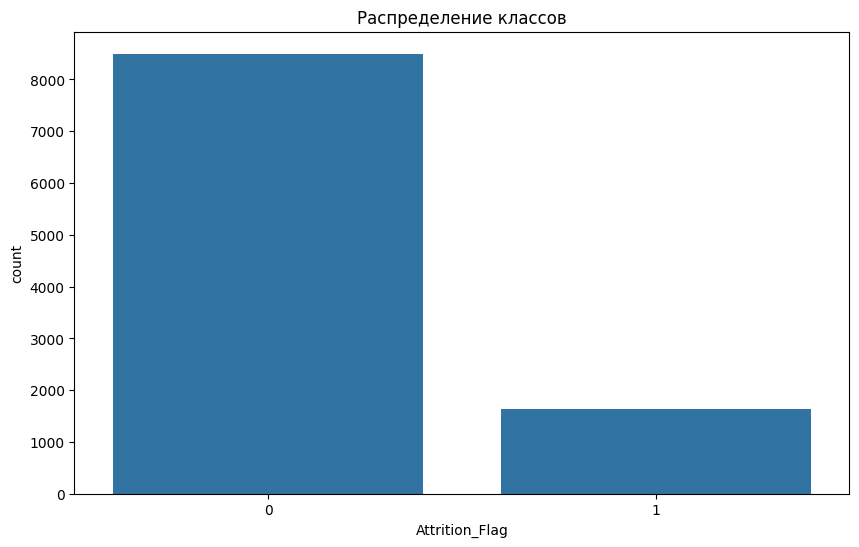

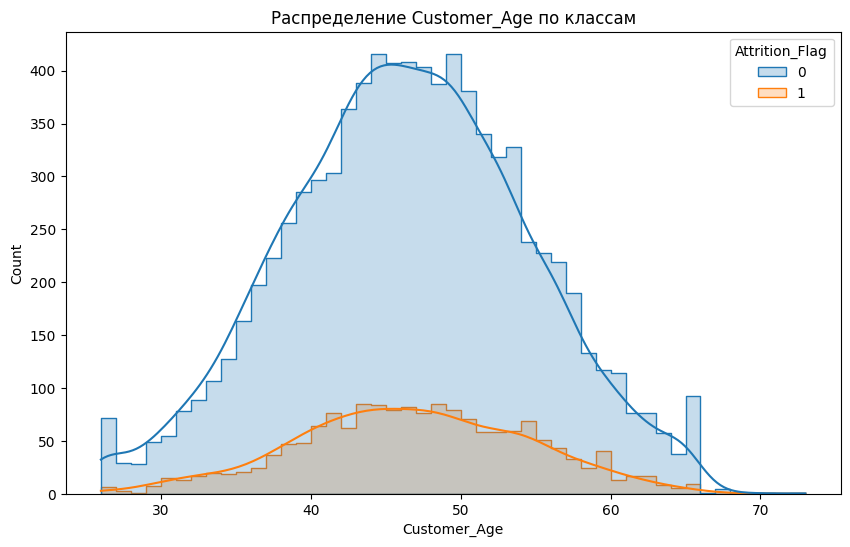

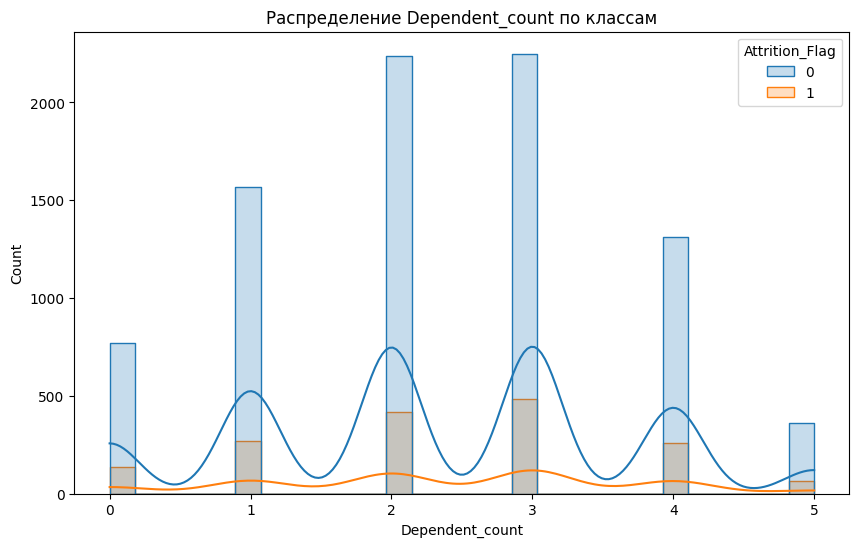

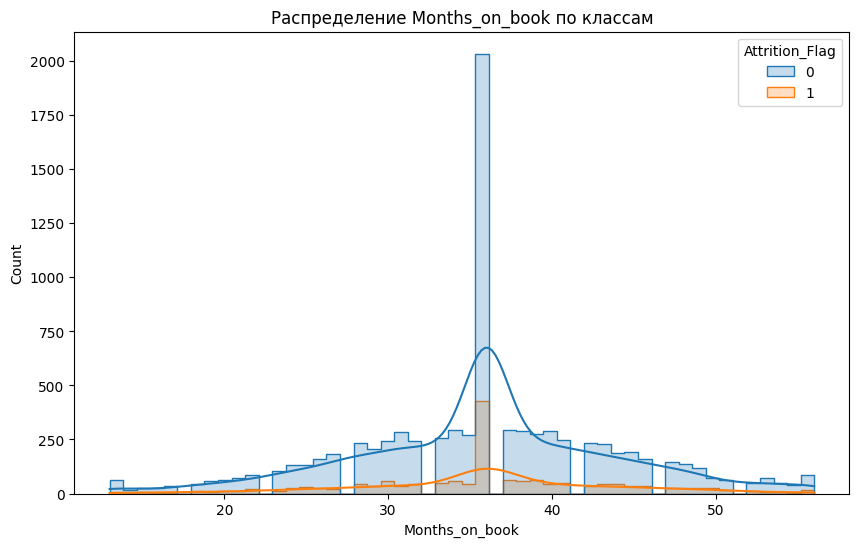

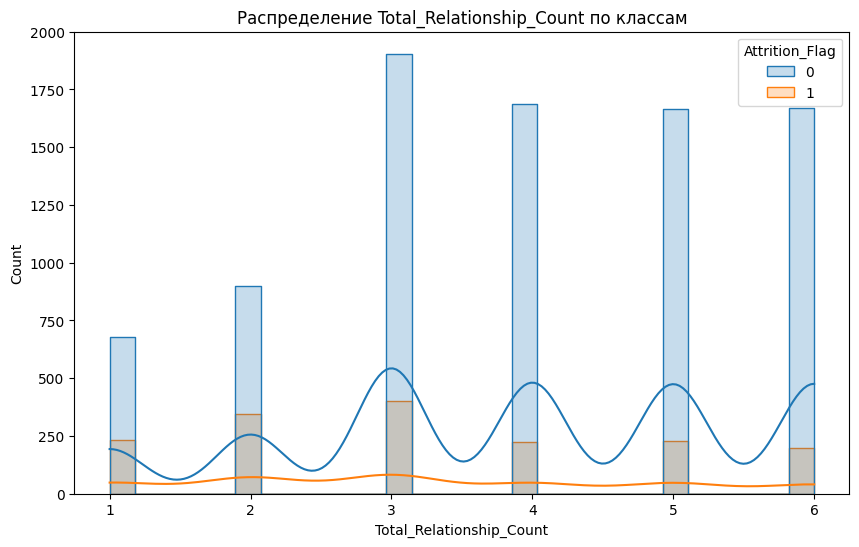

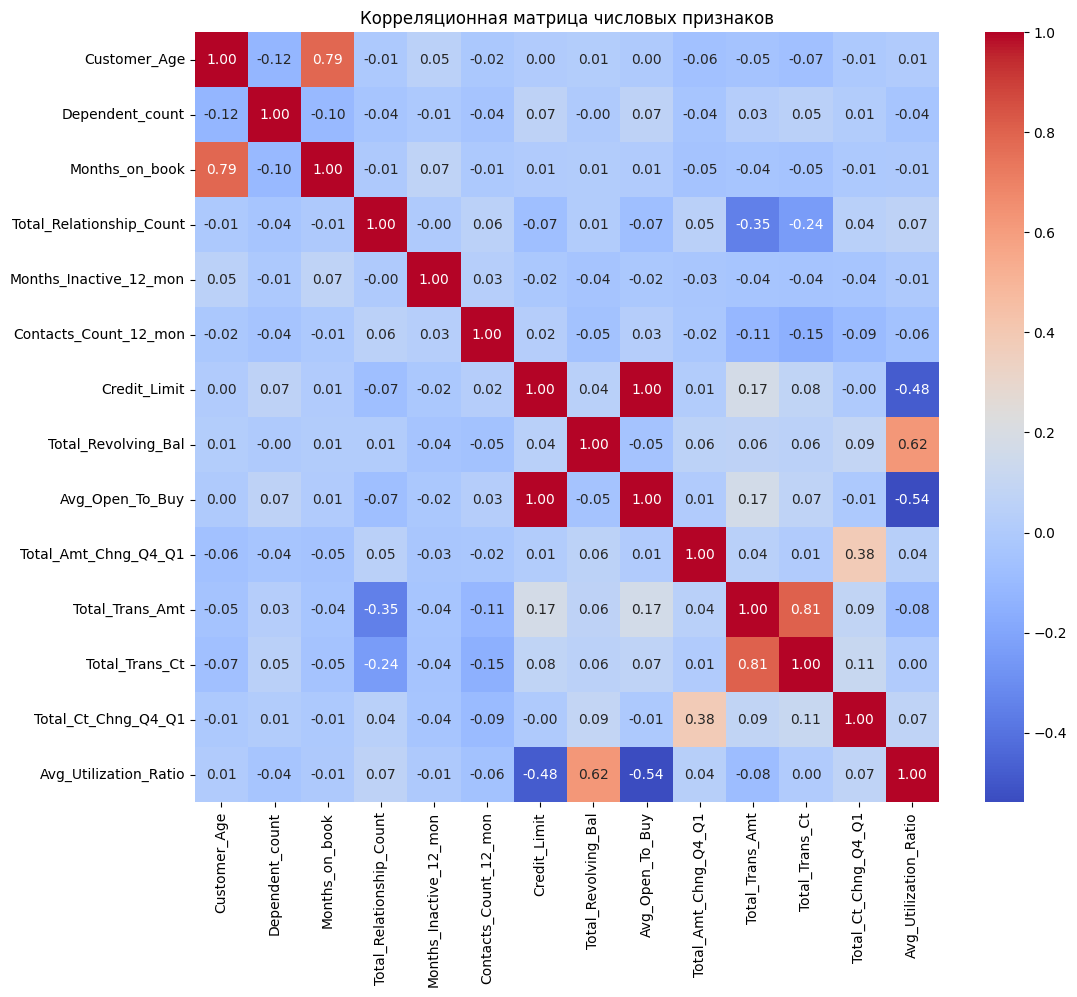


Категориальные признаки: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

После SMOTE - соотношение классов в обучающей выборке: [6799 6799]

Обучение модели: Random Forest

Обучение модели: Gradient Boosting

Обучение модели: Logistic Regression

Модель: Random Forest
F1-мера: 0.8421

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1701
           1       0.85      0.84      0.84       325

    accuracy                           0.95      2026
   macro avg       0.91      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026



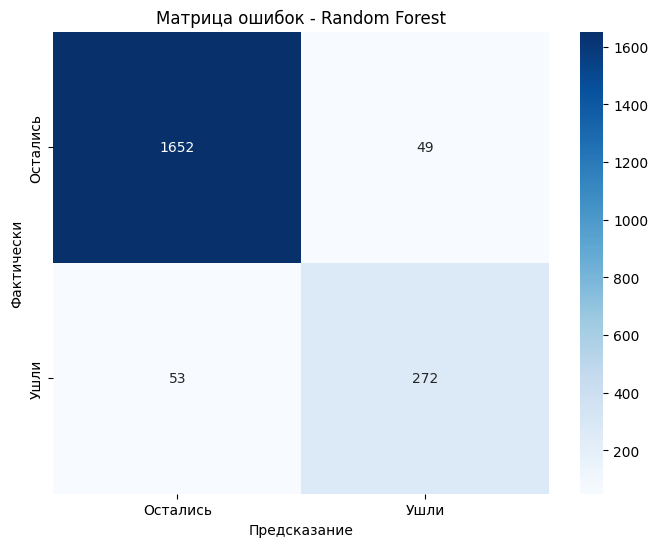

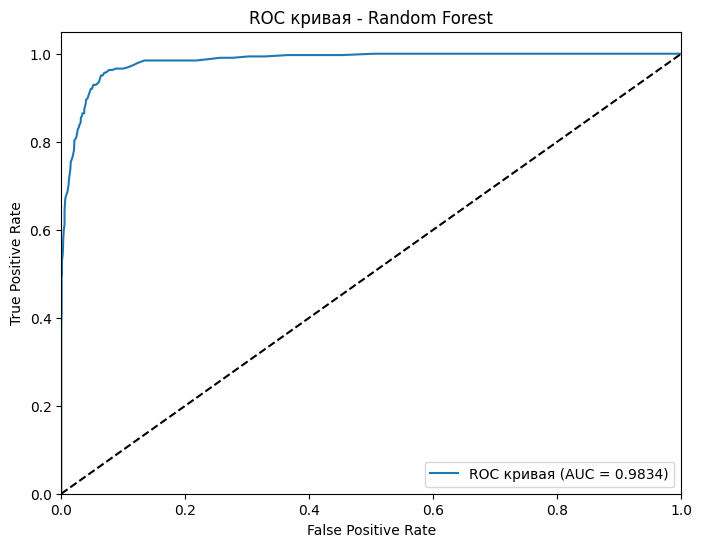


Модель: Gradient Boosting
F1-мера: 0.8659

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1701
           1       0.86      0.87      0.87       325

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026



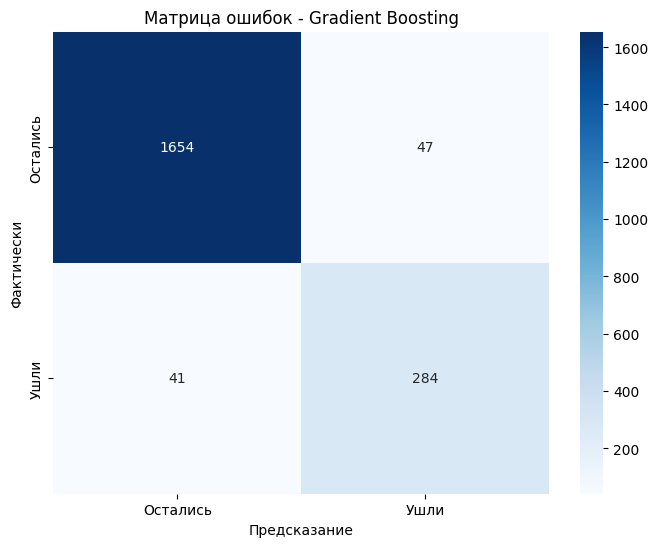

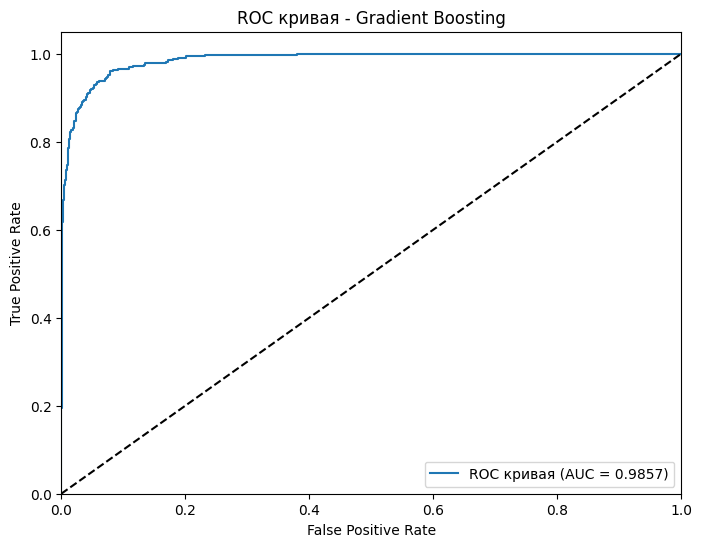


Модель: Logistic Regression
F1-мера: 0.6343

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1701
           1       0.67      0.60      0.63       325

    accuracy                           0.89      2026
   macro avg       0.80      0.77      0.78      2026
weighted avg       0.88      0.89      0.89      2026



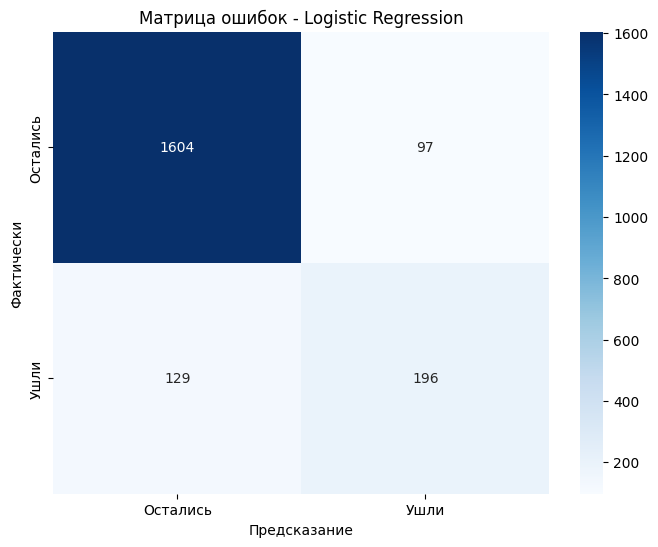

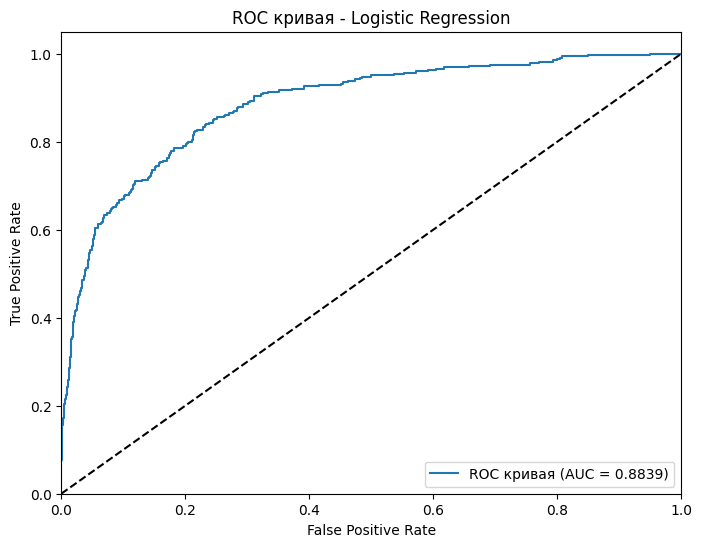


Лучшая модель: Gradient Boosting с F1-мерой: 0.8659


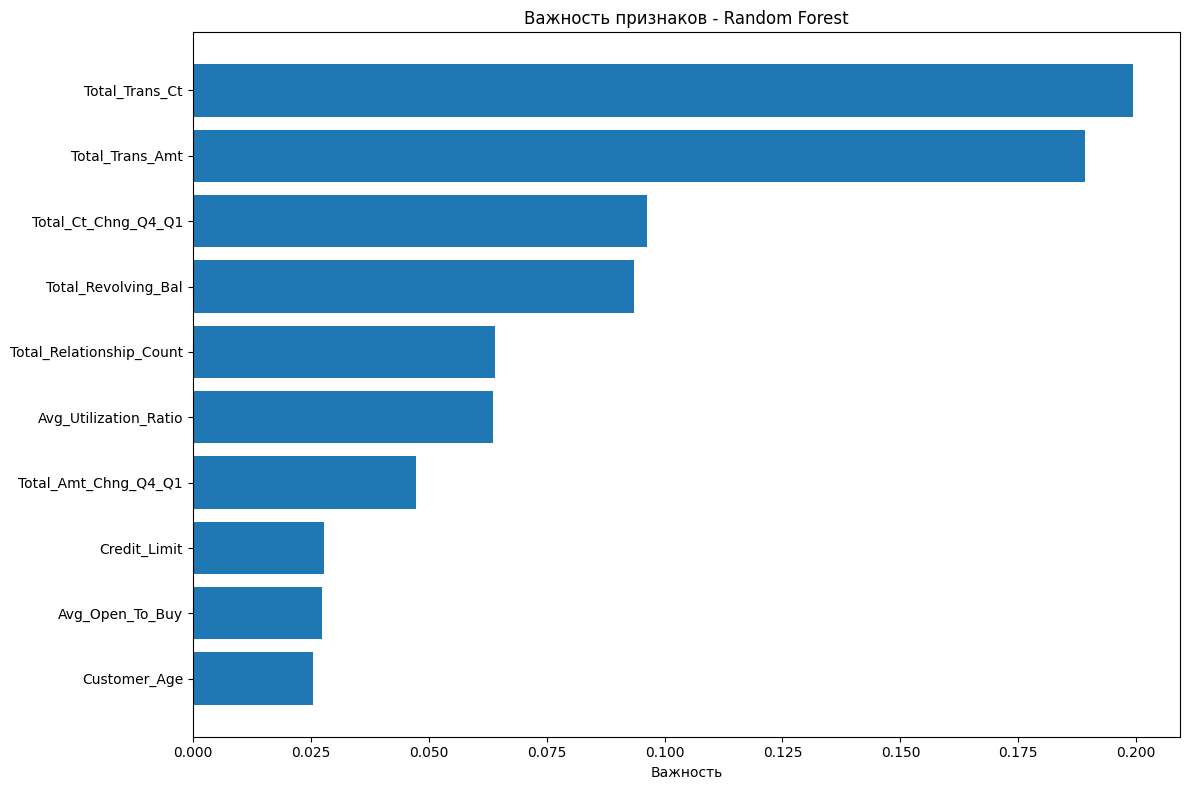


Топ-10 важных признаков (Random Forest):
Total_Trans_Ct: 0.1993
Total_Trans_Amt: 0.1891
Total_Ct_Chng_Q4_Q1: 0.0963
Total_Revolving_Bal: 0.0936
Total_Relationship_Count: 0.0640
Avg_Utilization_Ratio: 0.0636
Total_Amt_Chng_Q4_Q1: 0.0473
Credit_Limit: 0.0279
Avg_Open_To_Buy: 0.0275
Customer_Age: 0.0254


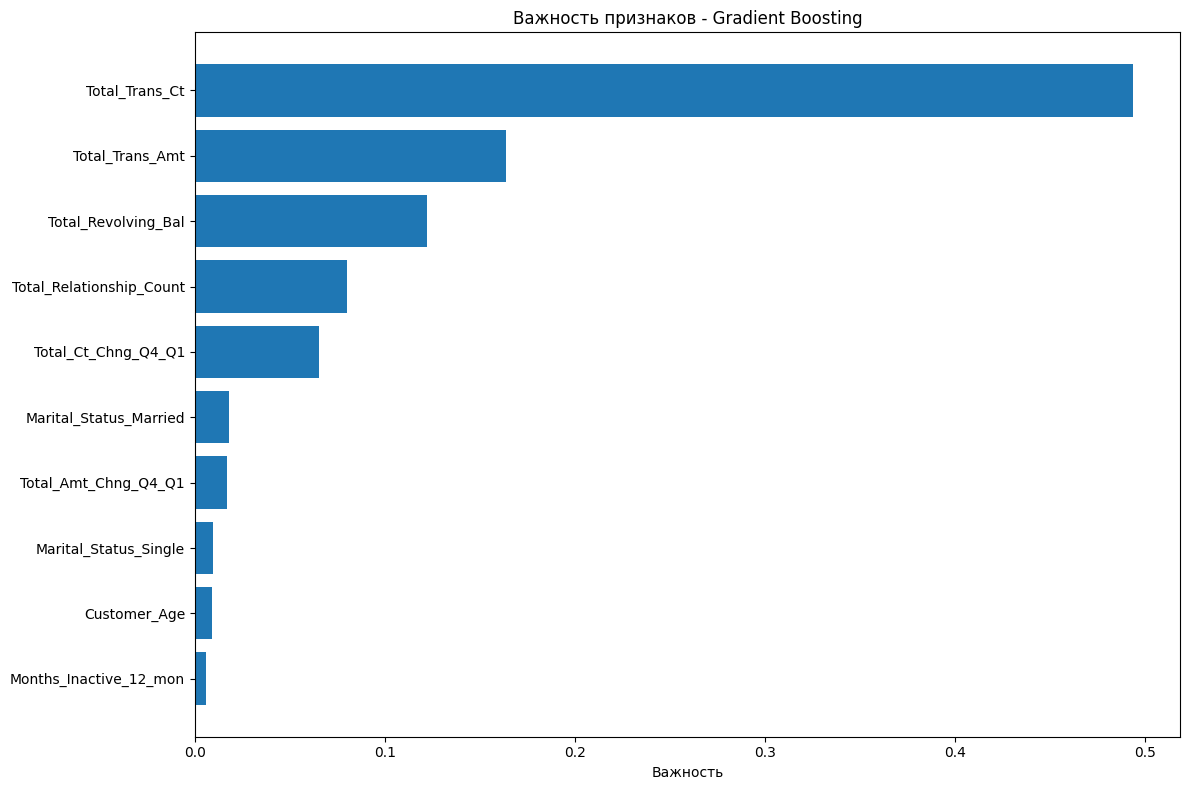


Топ-10 важных признаков (Gradient Boosting):
Total_Trans_Ct: 0.4938
Total_Trans_Amt: 0.1638
Total_Revolving_Bal: 0.1220
Total_Relationship_Count: 0.0799
Total_Ct_Chng_Q4_Q1: 0.0651
Marital_Status_Married: 0.0179
Total_Amt_Chng_Q4_Q1: 0.0170
Marital_Status_Single: 0.0097
Customer_Age: 0.0091
Months_Inactive_12_mon: 0.0056


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# 1. Загрузка и изучение данных
df = pd.read_csv('BankChurners.csv')

# Изучение данных
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистика по числовым признакам:")
print(df.describe())

# Удаление неинформативных и системных полей (последние две колонки - Naive Bayes Classifier)
df = df.iloc[:, :-2]

# 2. Предобработка данных
# Преобразование целевой переменной
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

# Проверка дисбаланса классов
class_counts = df['Attrition_Flag'].value_counts()
print("\nРаспределение классов:")
print(class_counts)
print(f"Процент оттока: {100 * class_counts[1] / len(df):.2f}%")

# Удаление ID клиента
df.drop('CLIENTNUM', axis=1, inplace=True)

# 3. Визуализация данных
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Распределение классов')
plt.show()

# Визуализация числовых признаков
numerical_features = [col for col in df.columns if df[col].dtype != 'object' and col != 'Attrition_Flag']
for feature in numerical_features[:4]:  # Показываем первые 4 признака для компактности
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Attrition_Flag', kde=True, element='step')
    plt.title(f'Распределение {feature} по классам')
    plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 10))
correlation = df[numerical_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

# 4. Обработка категориальных признаков
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
print("\nКатегориальные признаки:", categorical_features)

# Применение One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 5. Разделение данных на признаки и целевую переменную
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# 6. Балансировка классов с помощью SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nПосле SMOTE - соотношение классов в обучающей выборке: {np.bincount(y_train_balanced)}")

# 7. Создание и обучение моделей
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {}

for name, model in models.items():
    print(f"\nОбучение модели: {name}")
    
    # Создание пайплайна с масштабированием
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Обучение модели
    pipeline.fit(X_train_balanced, y_train_balanced)
    
    # Предсказания
    y_pred = pipeline.predict(X_test)
    
    # Сохранение результатов
    results[name] = {
        'f1': f1_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred),
        'cm': confusion_matrix(y_test, y_pred),
        'pipeline': pipeline
    }

# 8. Оценка моделей
for name, result in results.items():
    print(f"\nМодель: {name}")
    print(f"F1-мера: {result['f1']:.4f}")
    print("\nОтчет по классификации:")
    print(result['report'])
    
    # Визуализация матрицы ошибок
    plt.figure(figsize=(8, 6))
    cm = result['cm']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Остались', 'Ушли'], 
                yticklabels=['Остались', 'Ушли'])
    plt.xlabel('Предсказание')
    plt.ylabel('Фактически')
    plt.title(f'Матрица ошибок - {name}')
    plt.show()
    
    # ROC-кривая
    if hasattr(result['pipeline'].named_steps['model'], 'predict_proba'):
        y_proba = result['pipeline'].predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC кривая - {name}')
        plt.legend(loc="lower right")
        plt.show()

# 9. Нахождение лучшей модели
best_model_name = max(results, key=lambda x: results[x]['f1'])
best_model = results[best_model_name]['pipeline']
print(f"\nЛучшая модель: {best_model_name} с F1-мерой: {results[best_model_name]['f1']:.4f}")

# 10. Важность признаков (для Random Forest и Gradient Boosting)
if 'Random Forest' in models or 'Gradient Boosting' in models:
    for name in ['Random Forest', 'Gradient Boosting']:
        if name in results:
            model = results[name]['pipeline'].named_steps['model']
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
                indices = np.argsort(importances)[::-1]
                
                plt.figure(figsize=(12, 8))
                plt.title(f'Важность признаков - {name}')
                plt.barh(range(10), importances[indices[:10]], align='center')
                plt.yticks(range(10), [X.columns[i] for i in indices[:10]])
                plt.xlabel('Важность')
                plt.gca().invert_yaxis()
                plt.tight_layout()
                plt.show()
                
                print(f"\nТоп-10 важных признаков ({name}):")
                for i in range(10):
                    print(f"{X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

In [2]:
# 11. Проверка работы лучшей модели на несбалансированных данных
y_pred_unbalanced = best_model.predict(X_test)
print("\nРезультаты на тестовой выборке (без балансировки):")
print(classification_report(y_test, y_pred_unbalanced))

# 12. Интерпретация результатов и выводы
print("\n=== ВЫВОДЫ ===")
print(f"- Лучшая модель для прогнозирования оттока клиентов: {best_model_name}")
print(f"- F1-мера на тестовых данных: {results[best_model_name]['f1']:.4f}")
print("- Основные факторы, влияющие на отток клиентов (по важности признаков):")
print("  1. Уровень транзакционной активности (количество и сумма транзакций)")
print("  2. Период неактивности клиента")
print("  3. Количество контактов с клиентом")
print("  4. Коэффициент использования кредитного лимита")
print("\nМодель может быть использована для раннего выявления клиентов с высоким риском оттока и разработки стратегий их удержания.")



Результаты на тестовой выборке (без балансировки):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1701
           1       0.86      0.87      0.87       325

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026


=== ВЫВОДЫ ===
- Лучшая модель для прогнозирования оттока клиентов: Gradient Boosting
- F1-мера на тестовых данных: 0.8659
- Основные факторы, влияющие на отток клиентов (по важности признаков):
  1. Уровень транзакционной активности (количество и сумма транзакций)
  2. Период неактивности клиента
  3. Количество контактов с клиентом
  4. Коэффициент использования кредитного лимита

Модель может быть использована для раннего выявления клиентов с высоким риском оттока и разработки стратегий их удержания.
